# Import package and load dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!ls

ingredients.csv                 recette_data_analysis.ipynb
ingredients.csv:Zone.Identifier recipes.csv
recette_data_analysis-2.ipynb   recipes.csv:Zone.Identifier
recette_data_analysis-3.ipynb


In [3]:
ingredients=pd.read_csv("ingredients.csv")
recipes=pd.read_csv("recipes.csv")

In [4]:
pd.set_option("min_rows", 50)
pd.set_option("max_colwidth", 50)

# Utils

In [5]:
def fastcheck(data,drop=True):
    print('Data shape:\n',data.shape,\
          '\n\nColumns name:\n',list(data.columns),\
          '\n\nDatas type:\n',data.dtypes,'\n\nNull data:\n',\
          data.isnull().sum().sort_values(ascending=False)/len(data)*100)
    if data.duplicated().sum() > 0:
        print(f'\n\n{data.duplicated().sum()} duplicated data')
        if drop==True:
            data = data.drop_duplicates()
            print('\nDrop duplicates done : new data shape:\n',data.shape)
        else:
            print('\nDrop duplicates not done : data shape unchanged')
    else:
        print('No duplicate')
    data.sample(10)
    return data

# Display raw data recipes and ingredients dataframes

## Ingredients

In [6]:
ingredients

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
5,10534,citron
6,10534,125 g de beurre doux (le sortir 1/2 heure ava...
7,10531,"2 tomates (de saison, pour le goût)"
8,10531,herbes de Provence
9,10531,poivre


## Recipes

In [7]:
recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev..."
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ..."
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...
5,10527,https://www.marmiton.org/recettes/recette_lasa...,Lasagnes végétariennes (facile),Plat principal,"Si vous utilisez des oignons, faites-les reven..."
6,10522,https://www.marmiton.org/recettes/recette_gate...,Gâteau facile chocolat et coco,Dessert,Mélangez le lait concentré la noix de coco râp...
7,10521,https://www.marmiton.org/recettes/recette_fond...,Fondant au chocolat maison,Dessert,Faire fondre le chocolat dans un peu d’eau ou ...
8,10525,https://www.marmiton.org/recettes/recette_poul...,Poulet tandoori rouge,Plat principal,A préparer la veille !\nMélanger l'épice Tando...
9,10524,https://www.marmiton.org/recettes/recette_gate...,Gâteau basque,Dessert,Pâte (à faire la veille) : battre ensemble l'o...


# Exploration of recipes

## Check recipes  : 70 603 rows with 18 duplicates (<0,03%)  and 0 null

In [8]:
recipes=fastcheck(recipes)

Data shape:
 (70603, 5) 

Columns name:
 ['recipe_id', 'recipe_url', 'recipe_title', 'recipe_type', 'recipe_steps'] 

Datas type:
 recipe_id        int64
recipe_url      object
recipe_title    object
recipe_type     object
recipe_steps    object
dtype: object 

Null data:
 recipe_id       0.0
recipe_url      0.0
recipe_title    0.0
recipe_type     0.0
recipe_steps    0.0
dtype: float64


18 duplicated data

Drop duplicates done : new data shape:
 (70585, 5)


## Check recipe_steps (=instructions) format

### Add number of sentences in recipes in new column

In [9]:
#Count the number of sentences using punctuation "." and store it in field nb_sentences
#Warning : assumes that each sentence ends with "." (! or no punctuation is not counted)
recipes["nb_sentences"]=recipes["recipe_steps"].apply(lambda x: x.count("."))


/var/folders/79/kc35gvcn5h3dnnrgtwd2z2w40000gn/T/ipykernel_15348/453382256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes["nb_sentences"]=recipes["recipe_steps"].apply(lambda x: x.count("."))


In [10]:
recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...,8
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev...",3
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...,6
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...,7
5,10527,https://www.marmiton.org/recettes/recette_lasa...,Lasagnes végétariennes (facile),Plat principal,"Si vous utilisez des oignons, faites-les reven...",7
6,10522,https://www.marmiton.org/recettes/recette_gate...,Gâteau facile chocolat et coco,Dessert,Mélangez le lait concentré la noix de coco râp...,5
7,10521,https://www.marmiton.org/recettes/recette_fond...,Fondant au chocolat maison,Dessert,Faire fondre le chocolat dans un peu d’eau ou ...,10
8,10525,https://www.marmiton.org/recettes/recette_poul...,Poulet tandoori rouge,Plat principal,A préparer la veille !\nMélanger l'épice Tando...,4
9,10524,https://www.marmiton.org/recettes/recette_gate...,Gâteau basque,Dessert,Pâte (à faire la veille) : battre ensemble l'o...,12


### Median of 569 chars by instruction

/var/folders/79/kc35gvcn5h3dnnrgtwd2z2w40000gn/T/ipykernel_15348/276142442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes["nb_char"]=recipes["recipe_steps"].apply(lambda x: len(x))


nb_char    569.0
dtype: float64

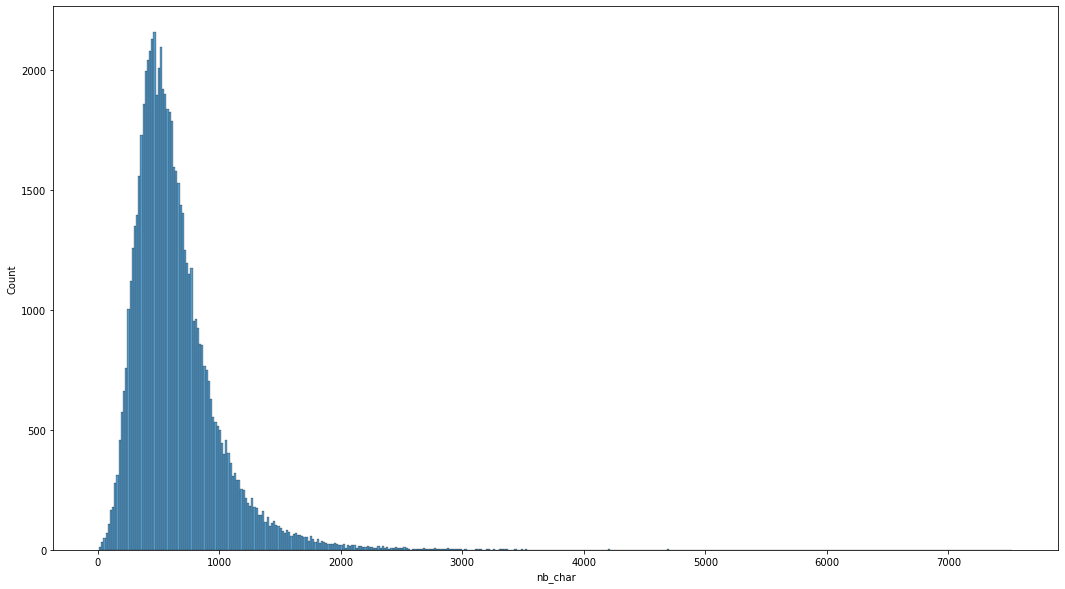

In [45]:
recipes["nb_char"]=recipes["recipe_steps"].apply(lambda x: len(x))
plt.figure(figsize=(18, 10))
sns.histplot(recipes['nb_char'])#, kde=True);
recipes[['nb_char']].median()

### Median of 8 sentences by instruction (based on "." occurence)


nb_sentences    8.0
dtype: float64

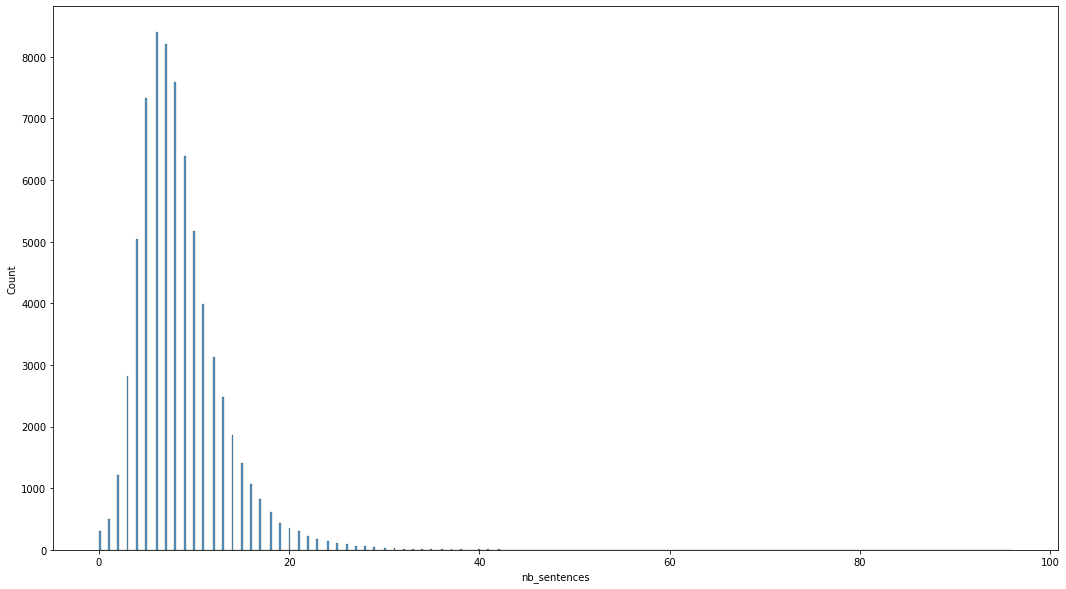

In [11]:
plt.figure(figsize=(18, 10))
sns.histplot(recipes['nb_sentences'])#, kde=True);
recipes[['nb_sentences']].median()

In [12]:
recipes.query("nb_sentences == 0")

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0
106,10717,https://www.marmiton.org/recettes/recette_sole...,Soleil d'Hawaii,Soleil d'hawaii,- Battre les 4 jaunes d'oeufs \n\n - Ajouter l...,0
979,12001,https://www.marmiton.org/recettes/recette_sauc...,Sauce / marinade Teriyaki,Sauce salée,Mélanger simplement tous les ingrédients !,0
1517,12776,https://www.marmiton.org/recettes/recette_sauc...,"Sauce pour salade figues, foie gras et noix",Sauce salée,Une simple émulsion et le tour est joué !,0
2086,13516,https://www.marmiton.org/recettes/recette_glac...,Glace à la banane,Dessert,"Passer tout ça au mixer, et faire prendre en s...",0
4624,16723,https://www.marmiton.org/recettes/recette_peti...,Petits pains cébette gorgonzola,Petits pains cébette gorgonzola,couper les petits pains en deux dans le sens d...,0
5135,17420,https://www.marmiton.org/recettes/recette_milk...,Milk shake à la pêche,Milk shake à la pêche,"Enlever la peau des pêches, mettre les 2 sache...",0
5149,17487,https://www.marmiton.org/recettes/recette_fond...,Fondant au chocolat pour les nuls !,Dessert,- faire fondre le chocolat dans une casserole ...,0
5207,17572,https://www.marmiton.org/recettes/recette_cock...,Cocktail du coucher de soleil,Cocktail du coucher de soleil,Mettez dans votre verre un fond de grenadine e...,0
5622,18099,https://www.marmiton.org/recettes/recette_marc...,Marcelline,Marcelline,"Dérouler la pâte feuilleté, la couper en quatr...",0


In [13]:
print(list(recipes.query("recipe_id==530831").iloc[:,4])[0])

Mettre les noisettes a torréfier au four à 160°C pendant 20 minutes 

 Mixer les 100g de noisettes jusqu'a obtention d'une pâte  

 Ajouter les chocolats dans le mixeur 

 Faire bouillir la crème et sucre  

 Verser progressivement la crème bouillante sur les chocolats tout en mixant  

 Mouler dans des moules en silicone rond de 4cm de diamètre la préparation et réservé la pendant minimum 2h au congélateur  

 Pour les cookies, mélanger le sucre muscovado, la poudre de noisette et le beurre pommade jusqu'a obtenir un mélange homogène 

 Ajouter l'oeuf  

 Ajouter la farine, la levure chimique et le sel 

 Concasser les noisettes et le chocolat  

 Ajouter les au mélange précédent 

 Diviser la pâte à cookies en boules de 50g 

 Démouler les inserts de pâte a tartiner et placer un insert au milieux de chaque cookies 

 Façonner les cookies de manière a enfermer l'insert de pâte a tartiner a l'intérieur du cookie bien hermétiquement  

 Disposer vos cookies sur une plaque avec une feuil

### Random check of instructions format

In [14]:
#Print n random
n=30
for i in range(n):
    print("\n =>RANDOM RECIPE ",str(i),"\n",list(recipes.sample(1)[["recipe_steps"]].iloc[0])[0])



 =>RANDOM RECIPE  0 
 Faire revenir ail, oignons et céleri émincés dans l’huile d’olive. 

 Ajouter les pommes de terre en morceaux, mouiller avec le bouillon et laisser cuire environ 30 min. 

 Assaisonner selon le goût. 

 Arrêter la cuisson, ajouter le bouquet de coriandre et mixer le tout (on peut ajuster la quantité de liquide selon que l’on aime une soupe plus ou moins liquide). 

 Servir glacé parsemé de coriandre fraîche.

 =>RANDOM RECIPE  1 
 Laver et couper les courgettes en rondelles. 

 Mettre à chauffer l'huile d'olive dans une sauteuse. 

 Ajouter les courgettes et laisser cuire pour que l'eau s'évapore un maximum. Saler. 

 En fin de cuisson, ajouté le cumin et laissez mijoté quelques minutes à feu doux. 

 Servir avec une viande blanche pour un repas vite fait et allégé !

 =>RANDOM RECIPE  2 
 Dans un mixer, mettre l'avocat pelé et dénoyauté, le jus de citron et le sucre. Mixer. Rectifier le sucre et le citron selon votre goût. 

 Servir frais.

 =>RANDOM RECIPE  3 


In [15]:
#Return a print of 5 random recipe_steps from the recipies table
def random_check_instructions(recipes,nbprint,col):
    recipes_sample=recipes.sample(500)
    for i in range(nbprint):
        print(f"\n---> RANDOM RECIPIE {i} \nTitle : {recipes_sample.iloc[i,2]}")
        print(f"Nb sentences : {recipes_sample.iloc[i,5]}")
        print(f"Recipe id : {recipes_sample.iloc[i,0]}\n")
        print(recipes_sample.iloc[i,col])

In [16]:
random_check_instructions(recipes,nbprint=5,col=4)


---> RANDOM RECIPIE 0 
Title : Quatre-quarts au chocolat
Nb sentences : 8
Recipe id : 15294

Faire fondre le chocolat avec le beurre 1 mn au micro ondes. Mélanger les oeufs avec le sucre jusqu'à ce que le mélange blanchisse. Puis ajouter la farine avec la levure. Bien mélanger.  

 Incorporer le mélange chocolat/beurre, puis enfin les pépites de chocolat. Beurrer et fariner un moule à cake et y verser la préparation. 

 Mettre au four à thermosat 5/6 (170°C) environ 40 mn. 

 Pour vérifier la cuisson, enfoncer la pointe d'un couteau, elle doit être sèche en sortant.

---> RANDOM RECIPIE 1 
Title : Layer cake aux trois chocolats
Nb sentences : 21
Recipe id : 339815

Le temps de la recette varie selon que l'on dispose d'un ou plusieurs moules à charnière ou moules à manqué. Pour ma part j'ai utilisé 2 moules à charnières de diamètre 21 cm. 

 Tout d'abord, diviser les doses en 3, sauf celles du chocolat, pour réaliser 3 moelleux avec chacun un chocolat différent, en ne prenant que 200 g

### Clean text in instructions

In [17]:
#This function is to clean the instructions of recipes
def clean_text(text):
    #1. Remove whitespace before each new line
    text=text.replace("\n\n ","\n\n")
    
    #2. Replace multiple punctuation 
    #USE REGEX ?
    return text

In [18]:
recipes["cleaned_instructions"]=recipes["recipe_steps"].apply(lambda x: clean_text(x))
recipes

/var/folders/79/kc35gvcn5h3dnnrgtwd2z2w40000gn/T/ipykernel_15348/1773282809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes["cleaned_instructions"]=recipes["recipe_steps"].apply(lambda x: clean_text(x))


,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences,cleaned_instructions
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...,8,Préchauffer le four à 210°C (thermostat 7). \n...
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev...",3,"Coupez l'oignon en petits morceaux, faites rev..."
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0,"- hacher (pas trop fin) le foie, le lard, les ..."
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...,6,Faire revenir les échalotes et les lardons dan...
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...,7,La veille : faire fondre le chocolat au bain-m...
5,10527,https://www.marmiton.org/recettes/recette_lasa...,Lasagnes végétariennes (facile),Plat principal,"Si vous utilisez des oignons, faites-les reven...",7,"Si vous utilisez des oignons, faites-les reven..."
6,10522,https://www.marmiton.org/recettes/recette_gate...,Gâteau facile chocolat et coco,Dessert,Mélangez le lait concentré la noix de coco râp...,5,Mélangez le lait concentré la noix de coco râp...
7,10521,https://www.marmiton.org/recettes/recette_fond...,Fondant au chocolat maison,Dessert,Faire fondre le chocolat dans un peu d’eau ou ...,10,Faire fondre le chocolat dans un peu d’eau ou ...
8,10525,https://www.marmiton.org/recettes/recette_poul...,Poulet tandoori rouge,Plat principal,A préparer la veille !\nMélanger l'épice Tando...,4,A préparer la veille !\nMélanger l'épice Tando...
9,10524,https://www.marmiton.org/recettes/recette_gate...,Gâteau basque,Dessert,Pâte (à faire la veille) : battre ensemble l'o...,12,Pâte (à faire la veille) : battre ensemble l'o...


In [19]:
random_check_instructions(recipes,nbprint=5,col=6)


---> RANDOM RECIPIE 0 
Title : Roulades de poulet au bacon (recette anglaise)
Nb sentences : 5
Recipe id : 35078

Couper le poulet en tranches très fines. Etaler du Boursin (ou une préparation maison à base de fromage et de poivre), rouler le tout dans une tranche de bacon.  

Une fois que tout le poulet est roulé, disposer dans un plat huilé au four (Th 6).   

Retourner les roulades régulièrement, et à mi-cuisson, rajouter des champignons dans le plat.  

Un fois que tout est bien cuit, d'un brun léger, servir bien chaud avec une purée et une salade.

---> RANDOM RECIPIE 1 
Title : Riz GHOL (Gruyère-Haricot-Oignons-Lardons)
Nb sentences : 6
Recipe id : 47868

Faire cuire le riz blanc 8 à 10 minutes environ. 

Pendant ce temps, faire blanchir les haricots 10 minutes dans l’eau bouillante. 

Dans une poêle, faire revenir l’oignon (sans matière grasse). 

Lorsque l’oignon est doré, ajouter les lardons. 

Après cuisson des aliments suivants, mélanger le tout dans un saladier et y ajoute

### Check recipe_type

In [20]:
#It is expected 9 recipe_type, but we have 25155 !!
print(recipes.recipe_type.nunique())

25155


In [21]:
recipes

,recipe_id,recipe_url,recipe_title,recipe_type,recipe_steps,nb_sentences,cleaned_instructions
0,10534,https://www.marmiton.org/recettes/recette_le-c...,Le crumble aux pommes du Chat qui Tousse,Dessert,Préchauffer le four à 210°C (thermostat 7). \n...,8,Préchauffer le four à 210°C (thermostat 7). \n...
1,10531,https://www.marmiton.org/recettes/recette_esca...,Escalopes lucullus à la cocotte,Plat principal,"Coupez l'oignon en petits morceaux, faites rev...",3,"Coupez l'oignon en petits morceaux, faites rev..."
2,10529,https://www.marmiton.org/recettes/recette_terr...,Terrine de foie de porc,Plat principal,"- hacher (pas trop fin) le foie, le lard, les ...",0,"- hacher (pas trop fin) le foie, le lard, les ..."
3,10530,https://www.marmiton.org/recettes/recette_lapi...,Lapin au vin blanc (à la cocotte),Plat principal,Faire revenir les échalotes et les lardons dan...,6,Faire revenir les échalotes et les lardons dan...
4,10528,https://www.marmiton.org/recettes/recette_truf...,Truffes en chocolat,Confiserie,La veille : faire fondre le chocolat au bain-m...,7,La veille : faire fondre le chocolat au bain-m...
5,10527,https://www.marmiton.org/recettes/recette_lasa...,Lasagnes végétariennes (facile),Plat principal,"Si vous utilisez des oignons, faites-les reven...",7,"Si vous utilisez des oignons, faites-les reven..."
6,10522,https://www.marmiton.org/recettes/recette_gate...,Gâteau facile chocolat et coco,Dessert,Mélangez le lait concentré la noix de coco râp...,5,Mélangez le lait concentré la noix de coco râp...
7,10521,https://www.marmiton.org/recettes/recette_fond...,Fondant au chocolat maison,Dessert,Faire fondre le chocolat dans un peu d’eau ou ...,10,Faire fondre le chocolat dans un peu d’eau ou ...
8,10525,https://www.marmiton.org/recettes/recette_poul...,Poulet tandoori rouge,Plat principal,A préparer la veille !\nMélanger l'épice Tando...,4,A préparer la veille !\nMélanger l'épice Tando...
9,10524,https://www.marmiton.org/recettes/recette_gate...,Gâteau basque,Dessert,Pâte (à faire la veille) : battre ensemble l'o...,12,Pâte (à faire la veille) : battre ensemble l'o...


In [22]:
recipes['recipe_type'].value_counts()


Plat principal                                     16614
Dessert                                            12540
Entrée                                              5444
Accompagnement                                      2892
Apéritif ou buffet                                  2456
Pizza, tarte, quiche                                1973
Salade                                              1228
Sauce salée                                          971
Confiserie                                           801
Boissons                                             476
Soupe au chocolat                                      2
Poulet aux abricots secs                               2
Salade méli-mélo                                       2
Poulet teriyaki                                        2
Gratin de christophines                                2
Poulet exotique                                        2
Poulet au riesling                                     2
Porc au citron                 

In [23]:
known_types=["Entrée", "Plat principal", "Dessert", "Amuse-gueule", "Accompagnement", "Sauce", "Boisson", "Confiserie", "Conseil"]
for idx,item in enumerate(known_types):
    nb_occurence=recipes.query(f"recipe_type=='{item}' ").shape[0]
    print(item," : ",nb_occurence," occurences,", round(100*nb_occurence/len(recipes)),"% of dataset")


Entrée  :  5444  occurences, 8 % of dataset
Plat principal  :  16614  occurences, 24 % of dataset
Dessert  :  12540  occurences, 18 % of dataset
Amuse-gueule  :  0  occurences, 0 % of dataset
Accompagnement  :  2892  occurences, 4 % of dataset
Sauce  :  0  occurences, 0 % of dataset
Boisson  :  0  occurences, 0 % of dataset
Confiserie  :  801  occurences, 1 % of dataset
Conseil  :  0  occurences, 0 % of dataset


(38291, 7)
(70585, 7)


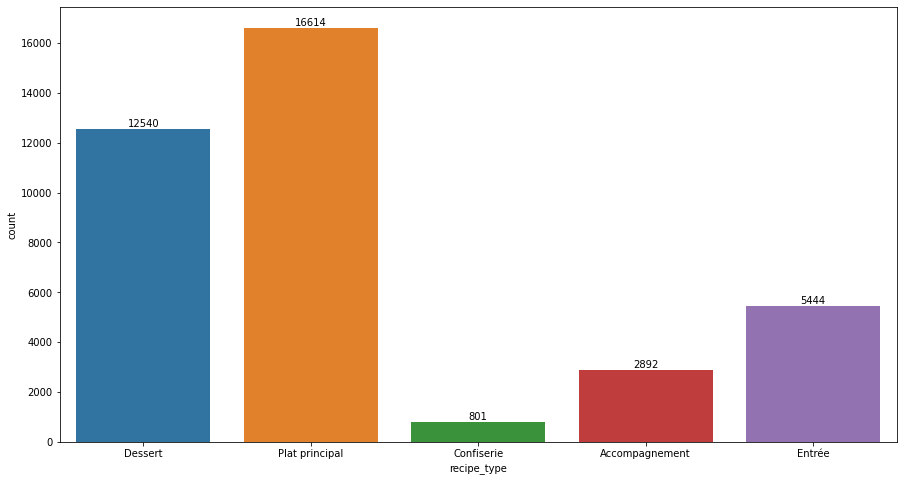

In [24]:
known_types=["Entrée", "Plat principal", "Dessert", "Amuse-gueule", "Accompagnement", "Sauce", "Boisson", "Confiserie", "Conseil"]
mask = recipes['recipe_type'].isin(known_types)
recipes[mask]

plt.figure(figsize=(15,8))
ax=sns.countplot(x="recipe_type", data=recipes[mask])
#To display the number
for container in ax.containers:
    ax.bar_label(container)

# En dropant tous les types non-connus on réduit le dataset presque de moitié : 70 585 -> 38 291

print(recipes[mask].shape)
print(recipes.shape)


# Exploration of ingredients

## Check ingredients : 578 330 rows with 2 694 duplicates (<0,5%) and 0 null

In [25]:
ingredients_new=fastcheck(ingredients)

Data shape:
 (578330, 2) 

Columns name:
 ['recipe_id', 'ingredient'] 

Datas type:
 recipe_id      int64
ingredient    object
dtype: object 

Null data:
 recipe_id     0.0
ingredient    0.0
dtype: float64


2694 duplicated data

Drop duplicates done : new data shape:
 (575636, 2)


In [26]:
ingredients_new

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
5,10534,citron
6,10534,125 g de beurre doux (le sortir 1/2 heure ava...
7,10531,"2 tomates (de saison, pour le goût)"
8,10531,herbes de Provence
9,10531,poivre


In [27]:
temp=ingredients.groupby("recipe_id").count().sort_values("ingredient")

In [28]:
temp

,ingredient
recipe_id,
65558,1
36648,1
314361,1
21905,1
47643,1
28945,1
254073,1
224612,1
93660,1


In [29]:
temp.query("ingredient==2")

,ingredient
recipe_id,
58933,2
230181,2
50865,2
18676,2
223351,2
320103,2
35044,2
41171,2
15353,2


In [30]:
ingredients.query("recipe_id==65924")

,recipe_id,ingredient
309837,65924,5 belles tranches de saumon fumé
309838,65924,1 boursin ail et fines herbes


# # On drop moins de 2 ingrédients et plus que 10 -> reste 388 342 rows

In [31]:
def resample_ingredients(ingredients,min_ingredient=2, max_ingredient=10):
    temp=ingredients.groupby("recipe_id").count()
    temp=temp.query(f"{min_ingredient}<=ingredient<={max_ingredient}")
    return ingredients[ingredients["recipe_id"].isin(temp.index)]

In [32]:
output2=resample_ingredients(ingredients)
output2

,recipe_id,ingredient
0,10534,6 pommes (des Canada par exemple)
1,10534,150 g de cassonade
2,10534,150 g de farine de blé
3,10534,1 petite cuillère de cannelle en poudre
4,10534,1 sachet de sucre vanillé
5,10534,citron
6,10534,125 g de beurre doux (le sortir 1/2 heure ava...
7,10531,"2 tomates (de saison, pour le goût)"
8,10531,herbes de Provence
9,10531,poivre


ingredient    8.0
dtype: float64

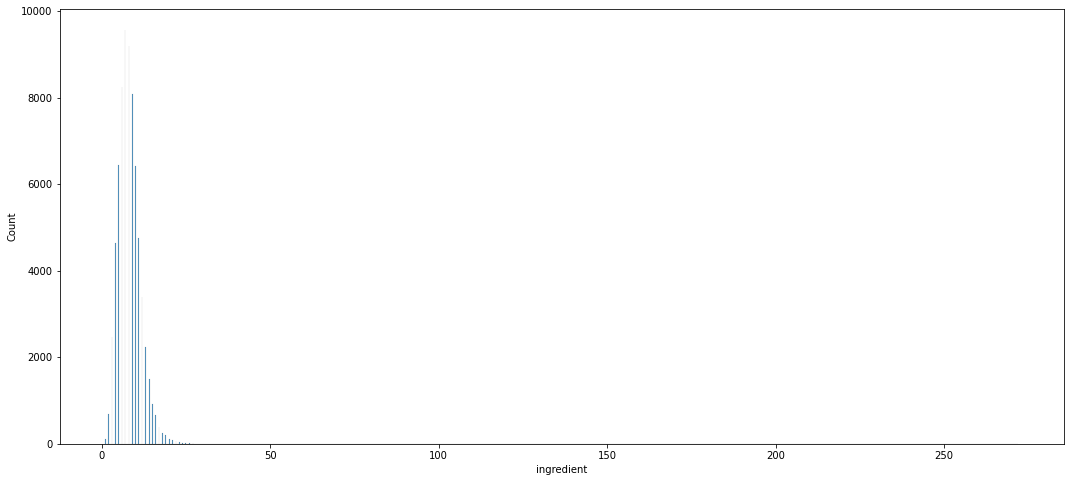

In [33]:
plt.figure(figsize=(18, 8))
sns.histplot(temp['ingredient'])#, kde=True);
temp[['ingredient']].median()

In [34]:
df_temp = df_temp.drop_duplicates()
df_temp


NameError: name 'df_temp' is not defined

# TODO analyse des données (pourcentage sucré et salé, nombre d'ingrédients, taille moyenne recette, recette 1 seul ingrédient, recette pas d'ingrédient), enlever les instructions inférieurs à 1 phrase (ou un mot, ou autre critere)